In [24]:
import platform
print('Python: ' + platform.python_version())

import numpy as np
print('numpy: ' + np.__version__)

import pandas as pd
print('pandas: ' + pd.__version__)

import scipy
print('scipy: ' + scipy.__version__)

import sklearn
print('scikit-learn: ' + sklearn.__version__)

#import matplotlib as plt
#print('matplotlib: ' + plt.__version__)

import flask
print('flask: ' + flask.__version__)

import os
import matplotlib.pyplot as plt

Python: 3.6.1
numpy: 1.13.0
pandas: 0.20.2
scipy: 0.19.0
scikit-learn: 0.18.1
flask: 0.12.2


In [2]:
#For linux
'''
path_1st_roe_sst = '/media/jedrzej/0CB49462B4945056/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2-1st-ROE-SST/v01'
path_2nd_jst_sst = '/media/jedrzej/0CB49462B4945056/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2-2nd-JST-SST/v01'
path_1st_hllc_sst = '/media/jedrzej/0CB49462B4945056/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2_1st_HLLC_SST/v01'
'''

"\npath_1st_roe_sst = '/media/jedrzej/0CB49462B4945056/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2-1st-ROE-SST/v01'\npath_2nd_jst_sst = '/media/jedrzej/0CB49462B4945056/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2-2nd-JST-SST/v01'\npath_1st_hllc_sst = '/media/jedrzej/0CB49462B4945056/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2_1st_HLLC_SST/v01'\n"

In [3]:
#For windows
#'''
path_1st_roe_sst = 'D:/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2-1st-ROE-SST/v01'
path_2nd_jst_sst = 'D:/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2-2nd-JST-SST/v01'
path_1st_hllc_sst = 'D:/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2_1st_HLLC_SST/v01'
#'''

In [4]:
os.chdir(path_1st_roe_sst)
hist_first_roe_sst = pd.DataFrame(pd.read_csv('history_sajben_1st_roe_sst.vtk', delimiter=",", decimal='.', header=0, skiprows=0, usecols=["Iteration", "Res_Flow[0]", "Res_Flow[1]", "Res_Flow[2]", "Res_Flow[3]", "Res_Flow[4]", "Res_Turb[0]", "Res_Turb[1]"])).set_index('Iteration')
unscalled_first_roe_sst = hist_first_roe_sst.apply(lambda x: 10**(x), axis=1)
n5_first_roe_sst = pd.DataFrame(unscalled_first_roe_sst.iloc[0:5].max()).transpose()
scalled_first_roe_sst = unscalled_first_roe_sst.div(n5_first_roe_sst.iloc[0],axis='columns')

In [5]:
os.chdir(path_2nd_jst_sst)
hist_second_jst_sst = pd.DataFrame(pd.read_csv('history_sajben_2nd_jst_sst.vtk', delimiter=",", decimal='.', header=0, skiprows=0, usecols=["Iteration", "Res_Flow[0]", "Res_Flow[1]", "Res_Flow[2]", "Res_Flow[3]", "Res_Flow[4]", "Res_Turb[0]", "Res_Turb[1]"])).set_index('Iteration')
unscalled_second_jst_sst = hist_second_jst_sst.apply(lambda x: 10**(x), axis=1)
n5_second_jst_sst = pd.DataFrame(unscalled_second_jst_sst.iloc[0:5].max()).transpose()
scalled_second_jst_sst = unscalled_second_jst_sst.div(n5_first_roe_sst.iloc[0],axis='columns')

In [6]:
os.chdir(path_1st_hllc_sst)
hist_first_hllc_sst = pd.DataFrame(pd.read_csv('history_sajben_1st_hllc_sst.vtk', delimiter=",", decimal='.', header=0, skiprows=0, usecols=["Iteration", "Res_Flow[0]", "Res_Flow[1]", "Res_Flow[2]", "Res_Flow[3]", "Res_Flow[4]", "Res_Turb[0]", "Res_Turb[1]"])).set_index('Iteration')
unscalled_first_hllc_sst = hist_first_hllc_sst.apply(lambda x: 10**(x), axis=1)
n5_first_hllc_sst = pd.DataFrame(unscalled_first_hllc_sst.iloc[0:5].max()).transpose()
scalled_first_hllc_sst = unscalled_first_hllc_sst.div(n5_first_roe_sst.iloc[0],axis='columns')

In [7]:
'''
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(hist_first_roe_sst['Res_Flow[0]'], 'r', label='Res_Flow[0]@1st_roe_sst')
ax.plot(hist_second_jst_sst['Res_Flow[0]'], 'g', label='Res_Flow[0]@2nd_jst_sst')
ax.plot(hist_first_hllc_sst['Res_Flow[0]'], 'b', label='Res_Flow[0]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()
'''

"\nfig, ax = plt.subplots(figsize=(10, 5)) \nax.plot(hist_first_roe_sst['Res_Flow[0]'], 'r', label='Res_Flow[0]@1st_roe_sst')\nax.plot(hist_second_jst_sst['Res_Flow[0]'], 'g', label='Res_Flow[0]@2nd_jst_sst')\nax.plot(hist_first_hllc_sst['Res_Flow[0]'], 'b', label='Res_Flow[0]@1st_hllc_sst ')\nlegend = ax.legend(loc='upper right', shadow=True)\nplt.xlabel('Iteration')\nplt.ylabel('Residual')\nplt.show()\n"

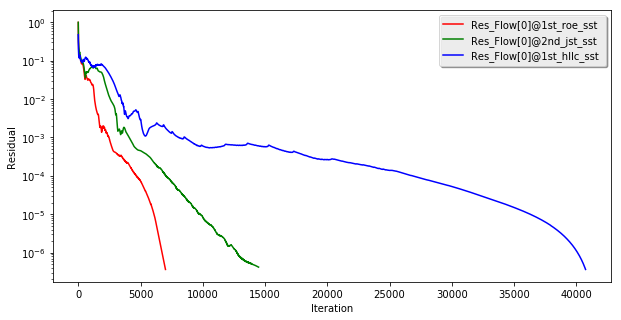

In [8]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(scalled_first_roe_sst['Res_Flow[0]'], 'r', label='Res_Flow[0]@1st_roe_sst')
ax.plot(scalled_second_jst_sst['Res_Flow[0]'], 'g', label='Res_Flow[0]@2nd_jst_sst')
ax.plot(scalled_first_hllc_sst['Res_Flow[0]'], 'b', label='Res_Flow[0]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()

In [9]:
'''fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(hist_first_roe_sst['Res_Flow[1]'], 'r', label='Res_Flow[1]@1st_roe_sst')
ax.plot(hist_second_jst_sst['Res_Flow[1]'], 'g', label='Res_Flow[1]@2nd_jst_sst')
ax.plot(hist_first_hllc_sst['Res_Flow[1]'], 'b', label='Res_Flow[1]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()
'''

"fig, ax = plt.subplots(figsize=(10, 5)) \nax.plot(hist_first_roe_sst['Res_Flow[1]'], 'r', label='Res_Flow[1]@1st_roe_sst')\nax.plot(hist_second_jst_sst['Res_Flow[1]'], 'g', label='Res_Flow[1]@2nd_jst_sst')\nax.plot(hist_first_hllc_sst['Res_Flow[1]'], 'b', label='Res_Flow[1]@1st_hllc_sst ')\nlegend = ax.legend(loc='upper right', shadow=True)\nplt.xlabel('Iteration')\nplt.ylabel('Residual')\nplt.show()\n"

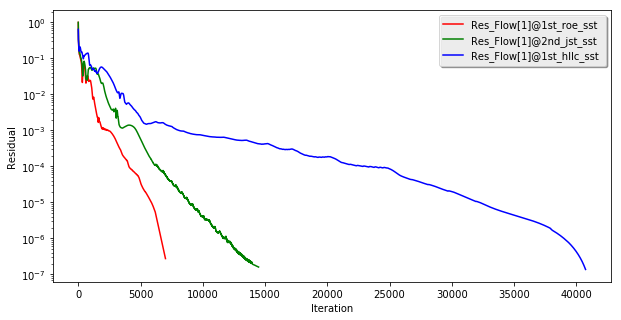

In [10]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(scalled_first_roe_sst['Res_Flow[1]'], 'r', label='Res_Flow[1]@1st_roe_sst')
ax.plot(scalled_second_jst_sst['Res_Flow[1]'], 'g', label='Res_Flow[1]@2nd_jst_sst')
ax.plot(scalled_first_hllc_sst['Res_Flow[1]'], 'b', label='Res_Flow[1]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()

In [11]:
'''fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(hist_first_roe_sst['Res_Flow[2]'], 'r', label='Res_Flow[2]@1st_roe_sst')
ax.plot(hist_second_jst_sst['Res_Flow[2]'], 'g', label='Res_Flow[2]@2nd_jst_sst')
ax.plot(hist_first_hllc_sst['Res_Flow[2]'], 'b', label='Res_Flow[2]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()
'''

"fig, ax = plt.subplots(figsize=(10, 5)) \nax.plot(hist_first_roe_sst['Res_Flow[2]'], 'r', label='Res_Flow[2]@1st_roe_sst')\nax.plot(hist_second_jst_sst['Res_Flow[2]'], 'g', label='Res_Flow[2]@2nd_jst_sst')\nax.plot(hist_first_hllc_sst['Res_Flow[2]'], 'b', label='Res_Flow[2]@1st_hllc_sst ')\nlegend = ax.legend(loc='upper right', shadow=True)\nplt.xlabel('Iteration')\nplt.ylabel('Residual')\nplt.show()\n"

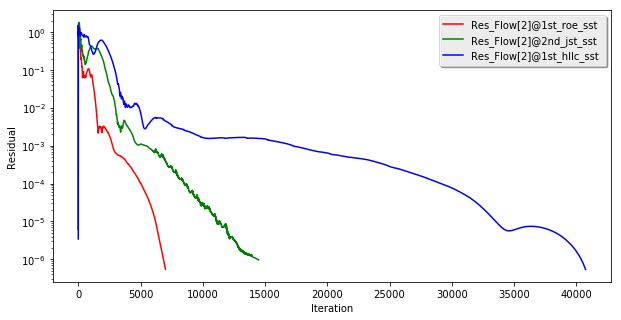

In [12]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(scalled_first_roe_sst['Res_Flow[2]'], 'r', label='Res_Flow[2]@1st_roe_sst')
ax.plot(scalled_second_jst_sst['Res_Flow[2]'], 'g', label='Res_Flow[2]@2nd_jst_sst')
ax.plot(scalled_first_hllc_sst['Res_Flow[2]'], 'b', label='Res_Flow[2]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()

In [13]:
'''fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(hist_first_roe_sst['Res_Flow[3]'], 'r', label='Res_Flow[3]@1st_roe_sst')
ax.plot(hist_second_jst_sst['Res_Flow[3]'], 'g', label='Res_Flow[3]@2nd_jst_sst')
ax.plot(hist_first_hllc_sst['Res_Flow[3]'], 'b', label='Res_Flow[3]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()
'''

"fig, ax = plt.subplots(figsize=(10, 5)) \nax.plot(hist_first_roe_sst['Res_Flow[3]'], 'r', label='Res_Flow[3]@1st_roe_sst')\nax.plot(hist_second_jst_sst['Res_Flow[3]'], 'g', label='Res_Flow[3]@2nd_jst_sst')\nax.plot(hist_first_hllc_sst['Res_Flow[3]'], 'b', label='Res_Flow[3]@1st_hllc_sst ')\nlegend = ax.legend(loc='upper right', shadow=True)\nplt.xlabel('Iteration')\nplt.ylabel('Residual')\nplt.show()\n"

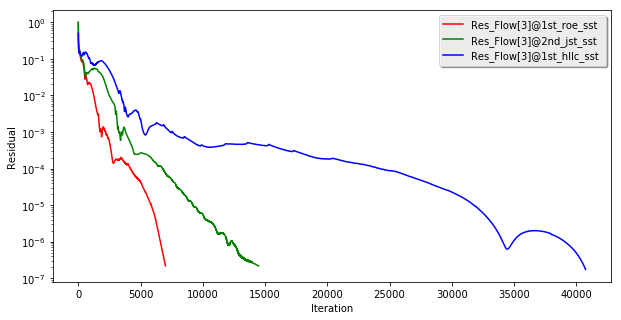

In [14]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(scalled_first_roe_sst['Res_Flow[3]'], 'r', label='Res_Flow[3]@1st_roe_sst')
ax.plot(scalled_second_jst_sst['Res_Flow[3]'], 'g', label='Res_Flow[3]@2nd_jst_sst')
ax.plot(scalled_first_hllc_sst['Res_Flow[3]'], 'b', label='Res_Flow[3]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()

In [15]:
'''
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(hist_first_roe_sst['Res_Turb[0]'], 'r', label='Res_Turb[0]@1st_roe_sst')
ax.plot(hist_second_jst_sst['Res_Turb[0]'], 'g', label='Res_Turb[0]@2nd_jst_sst')
ax.plot(hist_first_hllc_sst['Res_Turb[0]'], 'b', label='Res_Turb[0]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()
'''

"\nfig, ax = plt.subplots(figsize=(10, 5)) \nax.plot(hist_first_roe_sst['Res_Turb[0]'], 'r', label='Res_Turb[0]@1st_roe_sst')\nax.plot(hist_second_jst_sst['Res_Turb[0]'], 'g', label='Res_Turb[0]@2nd_jst_sst')\nax.plot(hist_first_hllc_sst['Res_Turb[0]'], 'b', label='Res_Turb[0]@1st_hllc_sst ')\nlegend = ax.legend(loc='upper right', shadow=True)\nplt.xlabel('Iteration')\nplt.ylabel('Residual')\nplt.show()\n"

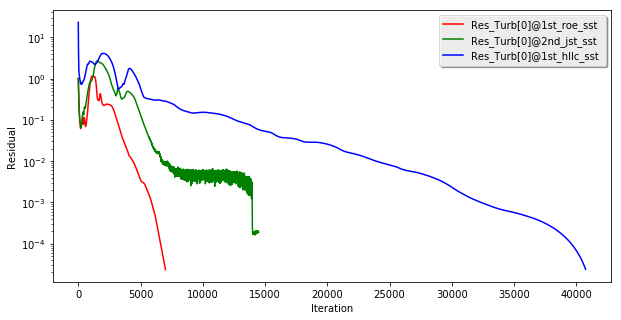

In [16]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(scalled_first_roe_sst['Res_Turb[0]'], 'r', label='Res_Turb[0]@1st_roe_sst')
ax.plot(scalled_second_jst_sst['Res_Turb[0]'], 'g', label='Res_Turb[0]@2nd_jst_sst')
ax.plot(scalled_first_hllc_sst['Res_Turb[0]'], 'b', label='Res_Turb[0]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()

In [17]:
'''
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(hist_first_roe_sst['Res_Turb[1]'], 'r', label='Res_Turb[1]@1st_roe_sst')
ax.plot(hist_second_jst_sst['Res_Turb[1]'], 'g', label='Res_Turb[1]@2nd_jst_sst')
ax.plot(hist_first_hllc_sst['Res_Turb[1]'], 'b', label='Res_Turb[1]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()
'''

"\nfig, ax = plt.subplots(figsize=(10, 5)) \nax.plot(hist_first_roe_sst['Res_Turb[1]'], 'r', label='Res_Turb[1]@1st_roe_sst')\nax.plot(hist_second_jst_sst['Res_Turb[1]'], 'g', label='Res_Turb[1]@2nd_jst_sst')\nax.plot(hist_first_hllc_sst['Res_Turb[1]'], 'b', label='Res_Turb[1]@1st_hllc_sst ')\nlegend = ax.legend(loc='upper right', shadow=True)\nplt.xlabel('Iteration')\nplt.ylabel('Residual')\nplt.show()\n"

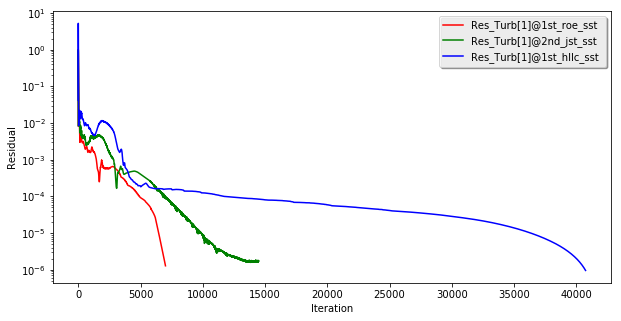

In [18]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(scalled_first_roe_sst['Res_Turb[1]'], 'r', label='Res_Turb[1]@1st_roe_sst')
ax.plot(scalled_second_jst_sst['Res_Turb[1]'], 'g', label='Res_Turb[1]@2nd_jst_sst')
ax.plot(scalled_first_hllc_sst['Res_Turb[1]'], 'b', label='Res_Turb[1]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()

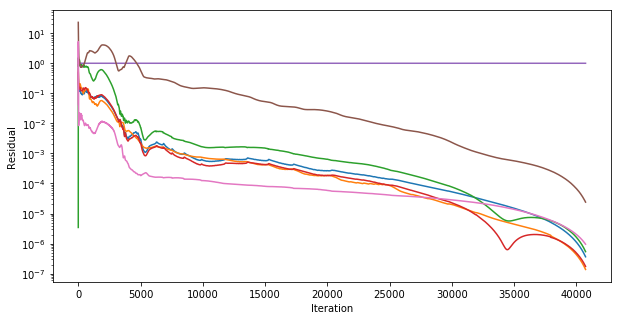

In [19]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(scalled_first_hllc_sst)
#legend = ax.legend(loc='upper right', shadow=True)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()

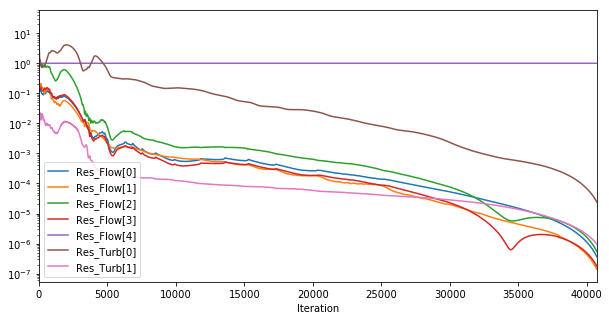

In [25]:
%matplotlib inline
scalled_first_hllc_sst.plot(figsize=(10, 5)); plt.yscale('log')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(scalled_first_hllc_sst)
#legend = ax.legend(loc='upper right', shadow=True)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()